Missing Values:
 review       0
sentiment    0
dtype: int64

Sentiment Class Distribution:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


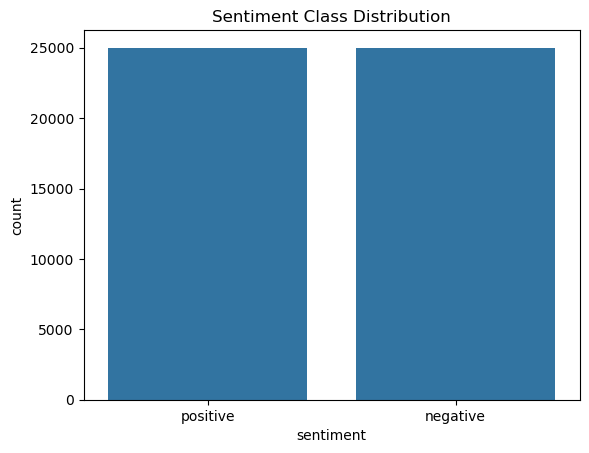

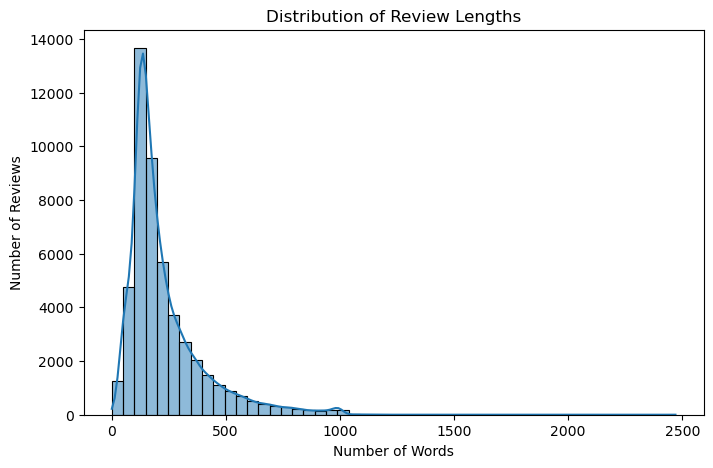

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("Imdb.csv")

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check class distribution
print("\nSentiment Class Distribution:\n", df['sentiment'].value_counts())

# Plot class distribution
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Class Distribution")
plt.show()

# Add column for review length
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Plot review length distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.show()


In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Load your dataset
df = pd.read_csv("Imdb.csv")

# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define full preprocessing function
def preprocess_text_nltk(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)             # Remove HTML tags
    text = re.sub(r"[^a-zA-Z]", " ", text)        # Remove non-alphabetic characters
    tokens = word_tokenize(text)                  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Stopword removal
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens]  # Lemma + stem
    return " ".join(tokens)

# Apply preprocessing
df['cleaned_review'] = df['review'].apply(preprocess_text_nltk)

# Show sample
print(df[['review', 'cleaned_review']].head())


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one review mention watch oz episod hook right ...  
1  wonder littl product film techniqu unassum old...  
2  thought wonder way spend time hot summer weeke...  
3  basic famili littl boy jake think zombi closet...  
4  petter mattei love time money visual stun film...  


In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag-of-Words (BoW)
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_review'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_review'])

# Encode sentiment labels
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})
y = df['label']

# Textual features
df['word_count'] = df['cleaned_review'].apply(lambda x: len(x.split()))
df['char_count'] = df['cleaned_review'].apply(len)
df['avg_word_length'] = df['char_count'] / df['word_count']

# Display sample features
print(df[['cleaned_review', 'word_count', 'char_count', 'avg_word_length']].head())


                                      cleaned_review  word_count  char_count  \
0  one review mention watch oz episod hook right ...         162         988   
1  wonder littl product film techniqu unassum old...          86         567   
2  thought wonder way spend time hot summer weeke...          84         518   
3  basic famili littl boy jake think zombi closet...          64         388   
4  petter mattei love time money visual stun film...         125         758   

   avg_word_length  
0         6.098765  
1         6.593023  
2         6.166667  
3         6.062500  
4         6.064000  


🔷 Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy: 0.8876


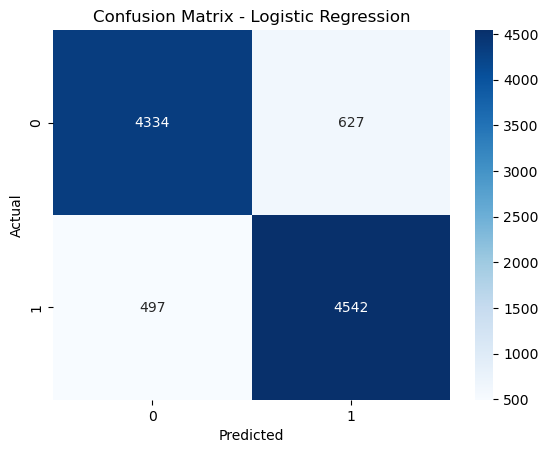

🔷 SVM Performance:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Accuracy: 0.8805


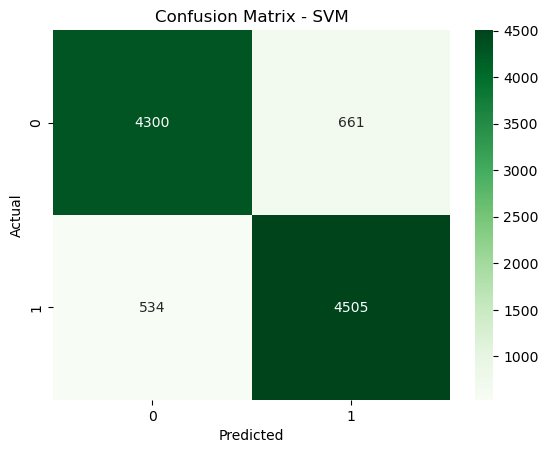

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_tin, y_train)
y_pred_lr = lr_model.predict(X_test)

print("🔷 Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Confusion matrix - Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Support Vector Machine (SVM)
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("🔷 SVM Performance:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

# Confusion matrix - SVM
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
